In [1]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
import pandas as pd
import matplotlib as plt
import numpy as np


In [2]:


# Downloading  the top 5 companies stock data
amazon_data = yf.download("AMZN", start="2013-01-01", end="2023-12-04", interval="1d")
nvda_data = yf.download("NVDA", start="2013-01-01", end="2023-12-04", interval="1d")
msft_data = yf.download("MSFT", start="2013-01-01", end="2023-12-04", interval="1d")
aapl_data = yf.download("AAPL", start="2013-01-01", end="2023-12-04", interval="1d")
googl_data = yf.download("GOOGL", start="2013-01-01", end="2023-12-04", interval="1d")

# Combining the closing prices into one DataFrame
combined_data = pd.DataFrame({
    'AMZN': amazon_data['Close'],
    'NVDA': nvda_data['Close'],
    'MSFT': msft_data['Close'],
    'AAPL': aapl_data['Close'],
    'GOOGL': googl_data['Close']
})

# Cleaning the data by forward-filling NaN values, then backfill to catch any leading NaNs
combined_data.fillna(method='ffill', inplace=True)
combined_data.fillna(method='bfill', inplace=True)

# Calculating the daily returns as the percentage change in the closing price
daily_returns = combined_data.pct_change()

# Ensuring that no NaN values remain 
daily_returns.dropna(inplace=True)

# This is the combined and cleaned dataset that's ready for Comparative Volatility Analysis
print(daily_returns.head())  # Display the first few rows to check the data

#  Calculating and displaying the annualized volatility for a quick look to see if furthur analysis can be done
annual_volatility = daily_returns.std() * np.sqrt(252)
print("\nAnnualized Volatility:")
print(annual_volatility)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                AMZN      NVDA      MSFT      AAPL     GOOGL
Date                                                        
2013-01-03  0.004547  0.000786 -0.013396 -0.012622  0.000581
2013-01-04  0.002592  0.032993 -0.018716 -0.027855  0.019760
2013-01-07  0.035925 -0.028897 -0.001870 -0.005882 -0.004363
2013-01-08 -0.007748 -0.021926 -0.005245  0.002691 -0.001973
2013-01-09 -0.000113 -0.022418  0.005650 -0.015629  0.006573

Annualized Volatility:
AMZN     0.327251
NVDA     0.447809
MSFT     0.269462
AAPL     0.284673
GOOGL    0.273986
dtype: float64



C:\Users\ebehnia\AppData\Local\Temp\ipykernel_24660\149483308.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)
C:\Users\ebehnia\AppData\Local\Temp\ipykernel_24660\149483308.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='bfill', inplace=True)


# Beta (β)
Beta measures a stock's volatility relative to the overall market or a specific benchmark (like the S&P 500). A beta greater than 1 indicates that the stock is more volatile than the market, while a beta less than 1 means it's less volatile.


In [4]:
# Defining the tickers for the stocks and the S&P 500 index
tickers = ['AMZN', 'NVDA', 'MSFT', 'AAPL', 'GOOGL', 'SPY']

# Downloading the historical price data
data = yf.download(tickers, start="2013-01-01", end="2023-12-04", interval="1d")['Adj Close']

# Calculating the daily returns
daily_returns = data.pct_change()

# Calculating the covariance of each stock with the S&P 500
covariance = daily_returns.cov().loc[tickers[:-1], 'SPY']

# Calculating the variance of the S&P 500
variance = daily_returns['SPY'].var()

# Calculating beta for each stock
beta = covariance / variance

print("Beta values relative to S&P 500:")
print(beta)

[*********************100%%**********************]  6 of 6 completed

Beta values relative to S&P 500:
Ticker
AMZN     1.164301
NVDA     1.656721
MSFT     1.205972
AAPL     1.183231
GOOGL    1.156353
Name: SPY, dtype: float64


# Analysis 

Amazon (AMZN) - Beta: 1.1643
Amazon's beta value suggests that its stock is slightly more volatile than the market. A movement in the S&P 500 is expected to lead to a slightly larger movement in Amazon's stock price, making it somewhat riskier than an average stock in the index.

Nvidia (NVDA) - Beta: 1.6567
Nvidia's beta is significantly higher than 1, indicating that its stock is much more volatile than the market. This suggests that Nvidia's stock price is likely to experience larger fluctuations in response to market movements, which could imply higher risk but also the potential for higher returns.

Microsoft (MSFT) - Beta: 1.2060
Microsoft's beta value is also above 1, indicating that its stock is more volatile than the market but to a lesser extent than Nvidia. This means Microsoft's stock price may move more than the market average in response to market changes, offering a mix of additional risk and potential return.

Apple (AAPL) - Beta: 1.1832
Apple's beta value is similar to Microsoft's and Amazon's, showing that its stock is more volatile than the market but not excessively so. Apple's stock movements are likely to be somewhat more pronounced than the market's, reflecting a moderate level of risk relative to the S&P 500.

Alphabet (GOOGL) - Beta: 1.1564
Alphabet's beta value is slightly above 1, similar to Amazon's, indicating that its stock has a slightly higher volatility than the market. This suggests Alphabet's stock price may react somewhat more to market movements, posing a slightly higher risk compared to an average market stock.

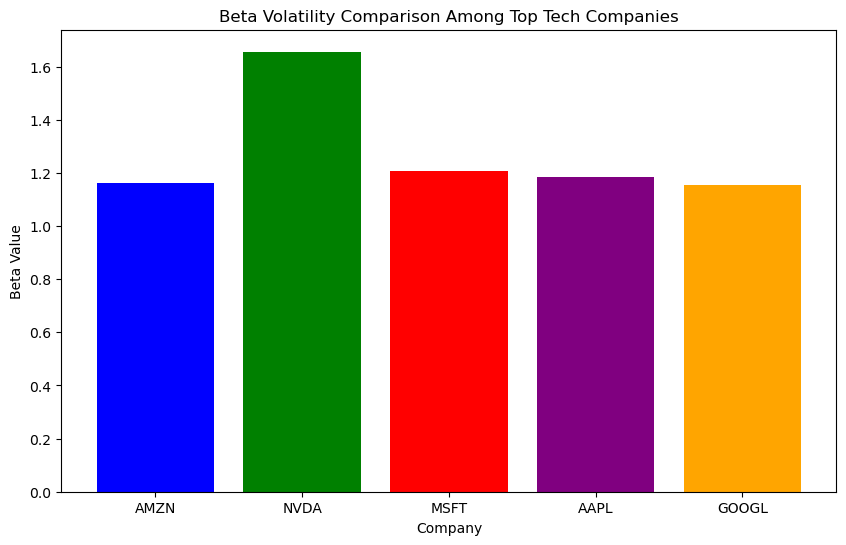

In [2]:
import matplotlib.pyplot as plt

# Beta values from your previous results
beta_values = {
    'AMZN': 1.164301,
    'NVDA': 1.656721,
    'MSFT': 1.205972,
    'AAPL': 1.183231,
    'GOOGL': 1.156353
}

# Names of the companies (for the x-axis)
companies = list(beta_values.keys())

# Corresponding beta values (for the y-axis)
betas = list(beta_values.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(companies, betas, color=['blue', 'green', 'red', 'purple', 'orange'])

# Displaying the title and labels
plt.title('Beta Volatility Comparison Among Top Tech Companies')
plt.xlabel('Company')
plt.ylabel('Beta Value')


plt.show()


# Value at Risk (VaR)
VaR is a statistical measure used to assess the risk level of an investment portfolio. It estimates how much a set of investments might lose, given normal market conditions, in a set time period such as a day.



In [3]:


# Downloading the historical stock data
tickers = ['AMZN', 'NVDA', 'MSFT', 'AAPL', 'GOOGL']
data = yf.download(tickers, start="2013-01-01", end="2023-12-04", interval="1d")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change()

# Calculate the 95% VaR using the Historical Method
VaR_95 = daily_returns.quantile(0.05)

# Convert VaR to positive values for conventional representation
VaR_95 = -VaR_95

print("95% Value at Risk (VaR) for each stock:")
print(VaR_95)

[*********************100%%**********************]  5 of 5 completed

95% Value at Risk (VaR) for each stock:
Ticker
AAPL     0.026661
AMZN     0.030576
GOOGL    0.025378
MSFT     0.025683
NVDA     0.040815
Name: 0.05, dtype: float64


# Analysis: 

Apple (AAPL) - VaR: 2.67%
This indicates that, based on historical data, there's a 95% chance that Apple's stock will not lose more than 2.67% of its value in a single day. This relatively low VaR suggests that Apple's stock is comparatively less risky among the stocks analyzed.

Amazon (AMZN) - VaR: 3.06%
Amazon's VaR is slightly higher than Apple's, indicating a slightly higher potential for daily loss. With a 95% confidence level, Amazon's stock could see a maximum daily loss of 3.06%, reflecting its somewhat higher volatility compared to Apple.

Alphabet (GOOGL) - VaR: 2.54%
Alphabet has the lowest VaR among the five stocks, suggesting it has the smallest expected daily loss at the 95% confidence level, with a maximum loss of 2.54%. This lower VaR points to Alphabet being the least risky in terms of daily price movements based on historical data.

Microsoft (MSFT) - VaR: 2.57%
Microsoft's VaR is very close to Alphabet's, indicating a low potential daily loss similar to Alphabet's. With a 95% confidence level, Microsoft's stock could experience a maximum daily loss of 2.57%, making it one of the less risky stocks among those analyzed.

Nvidia (NVDA) - VaR: 4.08%
Nvidia shows the highest VaR at 4.08%, suggesting that it has the highest potential for daily loss among the stocks. This higher VaR reflects Nvidia's relatively higher volatility and indicates that, with a 95% confidence level, Nvidia's stock could lose up to 4.08% of its value in a single day.

This VaR values provides a quantified risk assessment for potential losses, with Nvidia (NVDA) appearing as the most volatile or risky investment in terms of daily price movements. This could be due to its business model, market position, or sector-specific risks that lead to larger price swings.
Alphabet (GOOGL) and Microsoft (MSFT) show the lowest VaR, suggesting they are the least risky among these tech giants based on historical price movements. This might reflect their stable business operations, diversified revenue streams, or effective risk management strategies.
Apple (AAPL) and Amazon (AMZN) fall in the middle, with Amazon showing slightly higher potential for daily losses than Apple. This positions them as moderately volatile compared to the other stocks analyzed.
